# TP4 Feature Selection and Model Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFdr, chi2
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
best_scores1 = []
best_scores2 = []
best_alpha1 = []
best_alpha2 = []

## 1. Data study

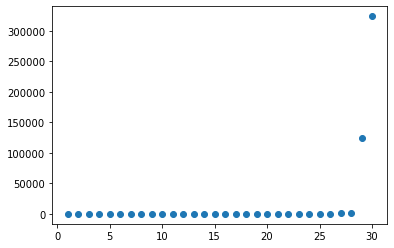

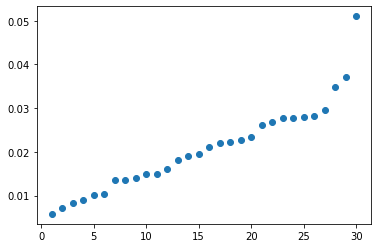

In [3]:
# Breast Cancer dataset

data = load_breast_cancer()

X, y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(data=X, columns=data.feature_names)
y = pd.DataFrame(data=y, columns=["Results"])

var = X.var()
var = np.array(var)
plt.scatter(np.linspace(1,30,30), np.sort(var))
plt.show()

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

var = X_scaled.var()
var = np.array(var)
plt.scatter(np.linspace(1,30,30), np.sort(var))
plt.show()

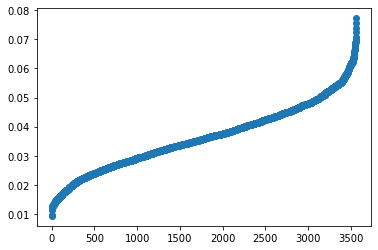

In [4]:
# Golub Dataset

X = pd.read_csv('Golub_X',sep=' ') # Observations
y = pd.read_csv('Golub_y',sep=' ') # Classes

X.columns = ['gene' + f'{i}' for i, x in enumerate(X.columns, 1)]

var = X.var()
var = np.array(var)
plt.scatter(np.linspace(1,3562,3562), np.sort(var))

One can see that some features of the Breast Cancer dataset present very high variances in comparison to the others, because of the high scale of the corresponding features (graph 1). We then decide to standardize this dataset for the fixed threshold to be more relevant (graph 2). 
However, feature variances of the Golub Dataset are well distributed (graph 3). That is why, in the rest of this practical work, for the specific method using a simple heuristic, we will use a standardized Breast Cancer dataset. 

## 2. Hyper-parameters optimization and scores

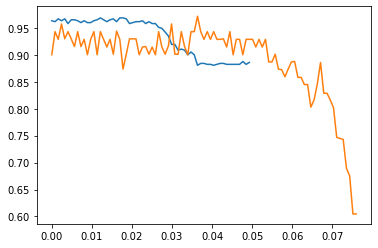

In [5]:
# Simple heuristic

scores1 = []
scores2 = []
thresholds = []

X1, y1 = load_breast_cancer(return_X_y=True)
X2 = pd.read_csv('Golub_X',sep=' ')
y2 = pd.read_csv('Golub_y',sep=' ')

min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(X1)
X1 = pd.DataFrame(X1)

min_max_scaler = preprocessing.MinMaxScaler()
X2 = min_max_scaler.fit_transform(X2)
X2 = pd.DataFrame(X2)

n = 100

for th in np.linspace(0, 0.08, n):
    clf = Pipeline([('feature_selection', VarianceThreshold(th)),
      ('classification', RandomForestClassifier())])
    thresholds.append(th)
    scores1.append(cross_val_score(clf, X1, y1, cv=5).mean())
    scores2.append(cross_val_score(clf, X2, y2, cv=5).mean())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(thresholds, scores1)
ax.plot(thresholds, scores2)

scores1r = [x for x in scores1 if str(x) != 'nan']
scores2r = [x for x in scores2 if str(x) != 'nan']
best_scores1.append(max(scores1r))
best_scores2.append(max(scores2r))

bs1 = scores1.index(max(scores1r))
bs2 = scores2.index(max(scores2r))
best_alpha1.append(thresholds[bs1])
best_alpha2.append(thresholds[bs2])
          
plt.show()

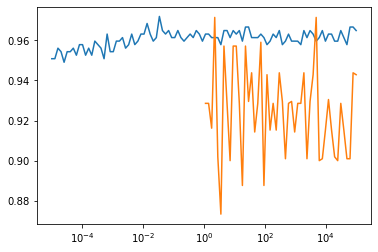

In [6]:
# Univariate

scores1 = []
scores2 = []
alphas = []

X1, y1 = load_breast_cancer(return_X_y=True)
X2 = pd.read_csv('Golub_X',sep=' ')
y2 = pd.read_csv('Golub_y',sep=' ')

n = 100

for alpha in np.logspace(-5, 5, n):
    clf = Pipeline([('feature_selection', SelectFdr(chi2, alpha=alpha)),
      ('classification', RandomForestClassifier())])
    alphas.append(alpha)
    scores1.append(cross_val_score(clf, X1, y1, cv=5).mean())
    scores2.append(cross_val_score(clf, X2, y2, cv=5).mean())
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(alphas, scores1)
ax.plot(alphas, scores2)
ax.set_xscale('log')

scores1r = [x for x in scores1 if str(x) != 'nan']
scores2r = [x for x in scores2 if str(x) != 'nan']
best_scores1.append(max(scores1r))
best_scores2.append(max(scores2r))

bs1 = scores1.index(max(scores1r))
bs2 = scores2.index(max(scores2r))
best_alpha1.append(alphas[bs1])
best_alpha2.append(alphas[bs2])
                    
plt.show()

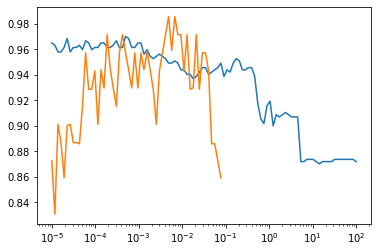

In [7]:
# Lasso

scores1 = []
scores2 = []
alphas = []

X1, y1 = load_breast_cancer(return_X_y=True)
X2 = pd.read_csv('Golub_X',sep=' ')
y2 = pd.read_csv('Golub_y',sep=' ')

n = 100

for alpha in np.logspace(-5, 2, n):
    clf = Pipeline([('feature_selection', SelectFromModel(linear_model.Lasso(alpha=alpha))),
      ('classification', RandomForestClassifier())])
    alphas.append(alpha)
    scores1.append(cross_val_score(clf, X1, y1, cv=5).mean())
    scores2.append(cross_val_score(clf, X2, y2, cv=5).mean())
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(alphas, scores1)
ax.plot(alphas, scores2)
ax.set_xscale('log')

scores1r = [x for x in scores1 if str(x) != 'nan']
scores2r = [x for x in scores2 if str(x) != 'nan']
best_scores1.append(max(scores1r))
best_scores2.append(max(scores2r))

bs1 = scores1.index(max(scores1r))
bs2 = scores2.index(max(scores2r))
best_alpha1.append(alphas[bs1])
best_alpha2.append(alphas[bs2])
                    
plt.show()

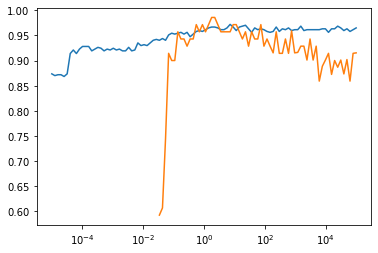

In [8]:
# SVM

scores1 = []
scores2 = []
Cs = []

X1, y1 = load_breast_cancer(return_X_y=True)
X2 = pd.read_csv('Golub_X',sep=' ')
y2 = pd.read_csv('Golub_y',sep=' ')

n = 100

for C in np.logspace(-5, 5, n):
    clf = Pipeline([('feature_selection', SelectFromModel(LinearSVC(C=C, penalty="l1", dual=False))),
      ('classification', RandomForestClassifier())])
    Cs.append(C)
    scores1.append(cross_val_score(clf, X1, y1, cv=5).mean())
    scores2.append(cross_val_score(clf, X2, y2, cv=5).mean())
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(Cs, scores1)
ax.plot(Cs, scores2)
ax.set_xscale('log')

scores1r = [x for x in scores1 if str(x) != 'nan']
scores2r = [x for x in scores2 if str(x) != 'nan']
best_scores1.append(max(scores1r))
best_scores2.append(max(scores2r))

bs1 = scores1.index(max(scores1r))
bs2 = scores2.index(max(scores2r))
best_alpha1.append(Cs[bs1])
best_alpha2.append(Cs[bs2])
                    
plt.show()

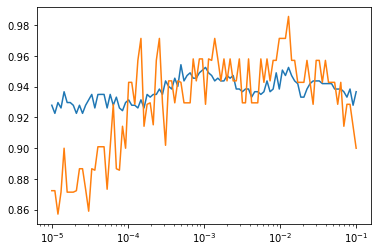

In [9]:
# Elastic Net

scores1 = []
scores2 = []
alphas = []

X1, y1 = load_breast_cancer(return_X_y=True)
X2 = pd.read_csv('Golub_X',sep=' ')
y2 = pd.read_csv('Golub_y',sep=' ')

n = 100

for alpha in np.logspace(-5, -1, n):
    clf = Pipeline([('feature_selection', SelectFromModel(ElasticNet(alpha=alpha, l1_ratio=0.7))),
      ('classification', RandomForestClassifier())])
    alphas.append(alpha)
    scores1.append(cross_val_score(clf, X1, y1, cv=5).mean())
    scores2.append(cross_val_score(clf, X2, y2, cv=5).mean())
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(alphas, scores1)
ax.plot(alphas, scores2)
ax.set_xscale('log')

scores1r = [x for x in scores1 if str(x) != 'nan']
scores2r = [x for x in scores2 if str(x) != 'nan']
best_scores1.append(max(scores1r))
best_scores2.append(max(scores2r))

bs1 = scores1.index(max(scores1r))
bs2 = scores2.index(max(scores2r))
best_alpha1.append(alphas[bs1])
best_alpha2.append(alphas[bs2])
                    
plt.show()

## 3. Number of selected features with optimal hyper-parameter

### 3.1 Breast Cancer dataset

In [10]:
# Breast Cancer dataset 

data = load_breast_cancer()

X, y = load_breast_cancer(return_X_y=True)

X = pd.DataFrame(data=X, columns=data.feature_names)
y = pd.DataFrame(data=y, columns=["Results"])

In [11]:
# Simple heuristic

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

th = best_alpha1[0]
selector = VarianceThreshold(th)
X_new = selector.fit_transform(X_scaled)
print( str(X_new.shape[1]) + ' features, reduction of ' + str(round((30-X_new.shape[1])/30*100, 2)) + '%')

24 features, reduction of 20.0%


In [12]:
# Univariate

alpha = best_alpha1[1]
selector = SelectFdr(chi2, alpha=alpha)
X_new = selector.fit_transform(X, y)
print( str(X_new.shape[1]) + ' features, reduction of ' + str(round((30-X_new.shape[1])/30*100, 2)) + '%')

16 features, reduction of 46.67%


17 features, reduction of 43.33%


<AxesSubplot:>

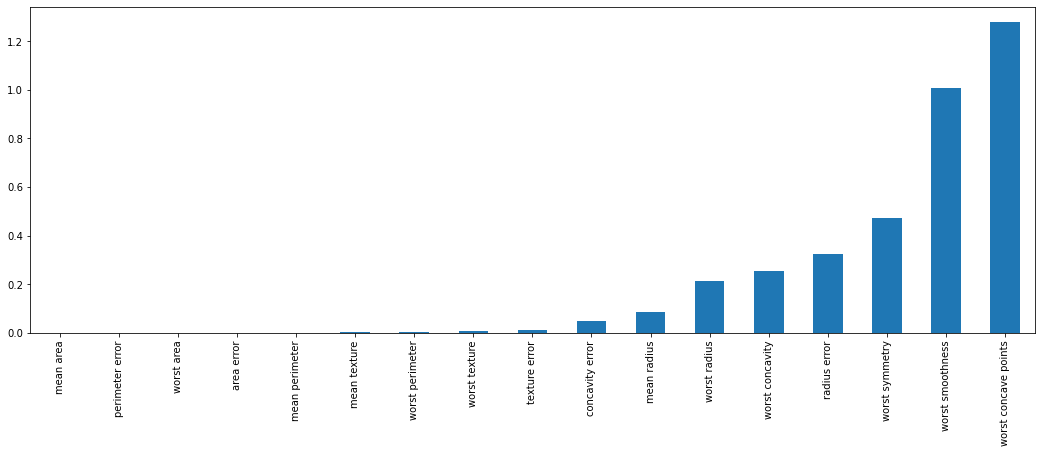

In [13]:
# Lasso

alpha = best_alpha1[2]
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, y)

feature_importance = pd.Series(index = X.columns, data = np.abs(clf.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

22 features, reduction of 26.67%


<AxesSubplot:>

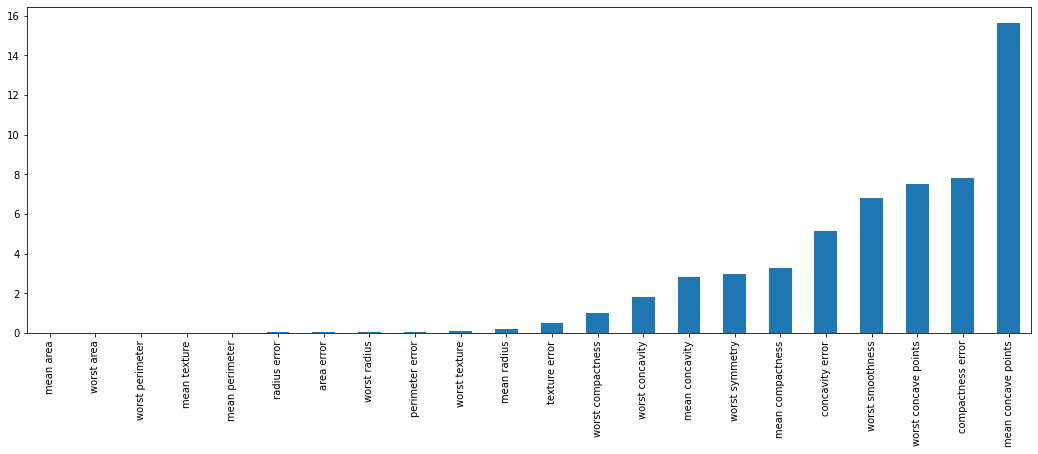

In [14]:
# SVM

C = best_alpha1[3]
clf = LinearSVC(C=C, penalty="l1", dual=False)
clf.fit(X, y)

feature_importance = pd.Series(index = X.columns, data = np.abs(clf.coef_[0]))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

19 features, reduction of 36.67%


<AxesSubplot:>

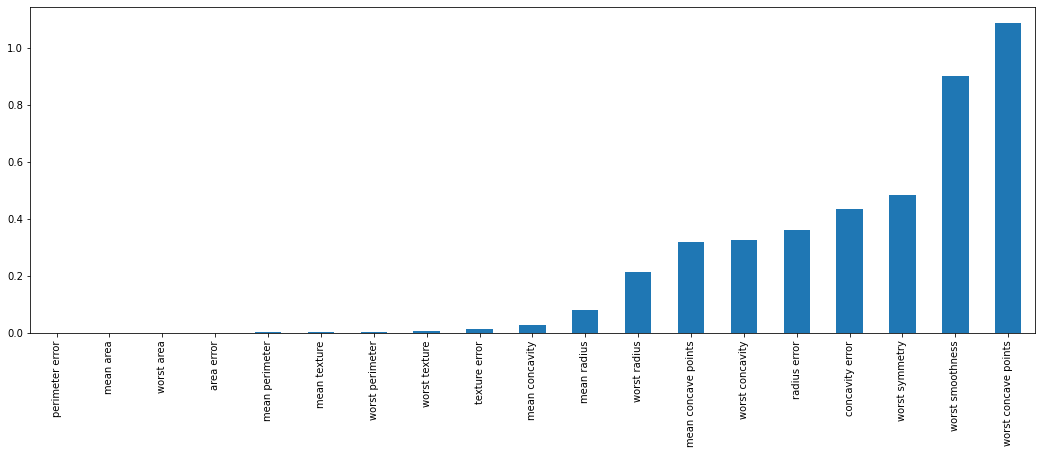

In [15]:
# Elastic Net

alpha = best_alpha1[4]
clf = ElasticNet(alpha=alpha, l1_ratio=0.7)
clf.fit(X,y)

feature_importance = pd.Series(index = X.columns, data = np.abs(clf.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

### 3.2 Golub Dataset

In [16]:
# Golub Dataset

X = pd.read_csv('Golub_X',sep=' ') # Observations
y = pd.read_csv('Golub_y',sep=' ') # Classes

X.columns = ['gene' + f'{i}' for i, x in enumerate(X.columns, 1)]

In [17]:
# Simple heuristic

th = best_alpha2[0]
selector = VarianceThreshold(th)
X_new = selector.fit_transform(X)
print( str(X_new.shape[1]) + ' features, reduction of ' + str(round((3562-X_new.shape[1])/3562*100, 2)) + '%')

1660 features, reduction of 53.4%


In [18]:
# Univariate

alpha = best_alpha2[1]
selector = SelectFdr(chi2, alpha=alpha)
X_new = selector.fit_transform(X, y)
print( str(X_new.shape[1]) + ' features, reduction of ' + str(round((3562-X_new.shape[1])/3562*100, 2)) + '%')

3562 features, reduction of 0.0%


37 features, reduction of 98.96%


<AxesSubplot:>

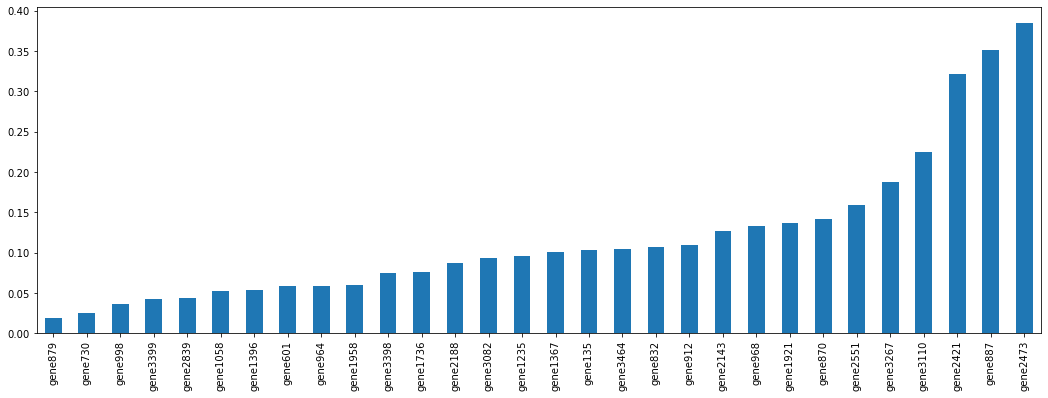

In [19]:
# Lasso

alpha = best_alpha2[2]
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, y)

feature_importance = pd.Series(index = X.columns, data = np.abs(clf.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

37 features, reduction of 98.96%


<AxesSubplot:>

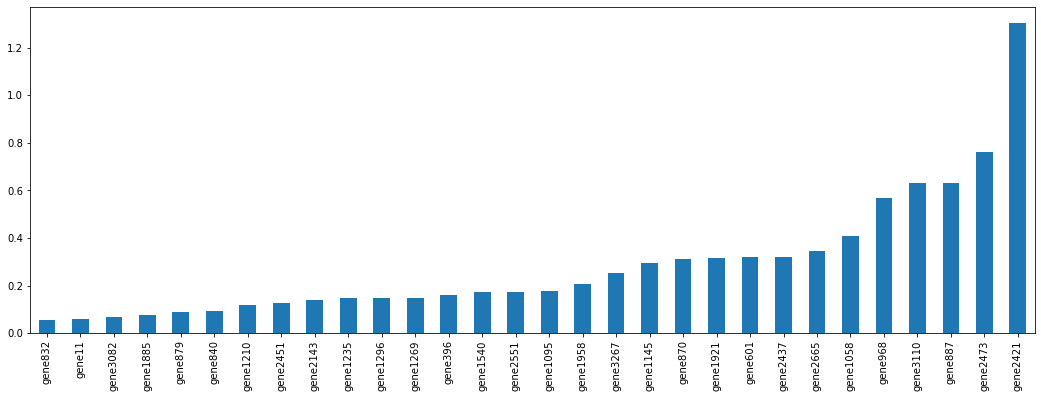

In [20]:
# SVM

C = best_alpha2[3]
clf = LinearSVC(C=C, penalty="l1", dual=False)
clf.fit(X, y)

feature_importance = pd.Series(index = X.columns, data = np.abs(clf.coef_[0]))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

34 features, reduction of 99.05%


<AxesSubplot:>

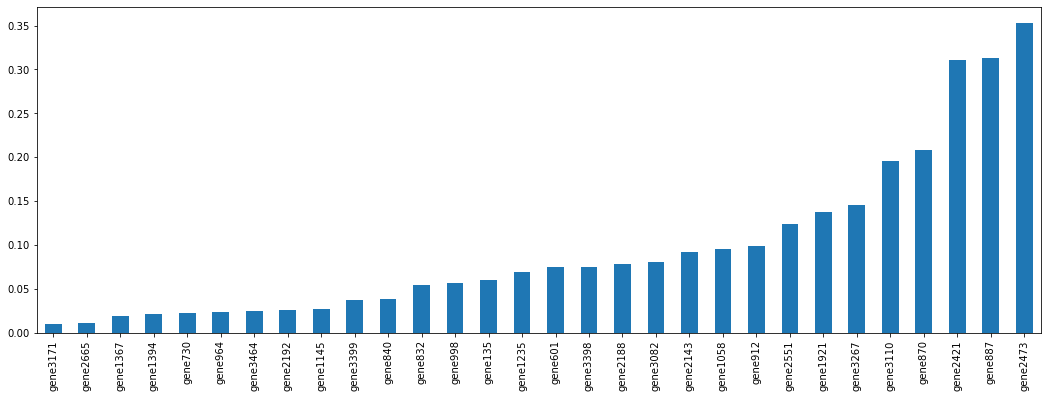

In [21]:
# Elastic Net

alpha = best_alpha2[4]
clf = ElasticNet(alpha=alpha, l1_ratio=0.7)
clf.fit(X,y)

feature_importance = pd.Series(index = X.columns, data = np.abs(clf.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

## 4. Overall performances

In [22]:
Labels = ['Simple', 'Univariate', 'Lasso', 'SVM', 'Elastic Net']

for i in range(5):
    print('Best ' + str(Labels[i]) + ' score for Breast Cancer dataset is : ' + str(best_scores1[i]))
    print('Best ' + str(Labels[i]) + ' score for Golub dataset is : ' + str(best_scores2[i]))
    print('\n')

Best Simple score for Breast Cancer dataset is : 0.9683744760130415
Best Simple score for Golub dataset is : 0.9714285714285715


Best Univariate score for Breast Cancer dataset is : 0.9719142990218911
Best Univariate score for Golub dataset is : 0.9714285714285715


Best Lasso score for Breast Cancer dataset is : 0.9701443875174661
Best Lasso score for Golub dataset is : 0.9857142857142858


Best SVM score for Breast Cancer dataset is : 0.9718987734823784
Best SVM score for Golub dataset is : 0.9857142857142858


Best Elastic Net score for Breast Cancer dataset is : 0.9543238627542309
Best Elastic Net score for Golub dataset is : 0.9857142857142858




## 5. Results analysis

To compare the performances and behaviour of the different methods, we used a pipeline made of a feature selector and a classifier. The different feature selectors correspond to the used methods and we chose a RandomForest Classifier as a common classifier. We greedily searched for the best hyper-parameter for each method in the second section and determined the corresponding number of selected features in the third section. 

One can see that the hyper-parameter optimization is important for most methods in order to reach good performances. For the two proposed datasets and for each of the 5 methods, we found an hyper-parameter value that gave at least 95% accuracy with a 5-cross validation. 

For the Breast Cancer dataset, the best score is 0.9719 and is obtained with the univariate method. The number of selected features is 16, corresponding to a 46,7% reduction. 

For the Golub Dataset, the best score is 0.98571 and is obtained at the same time by the three last methods. The number of selected feature is very similar for the three methods with a feature reduction of at least 98.7 %. 

For both datasets, one can see that the elastic net and lasso regression give similar results, as illustrated by the corresponding feature importances. On the other hand, the SVM feature selector allocates importance to different features than the two previous methods. 

One can observe that in the Breast Cancer dataset, the two features that seems the most discriminative are "Worst concave points" and "Worst smoothness" while the three genes "gene 2473", "gene 2421" and "gene 887" seem to be the most important in the Golub dataset overall. 

One can see that for some methods, the optimal found performance is reached with no discarded features. Besides, for the Golub Dataset, the two first methods present a very different behaviour than the three last ones, with a relatively low feature reduction. Conversely, for the breast cancer dataset, all methods present relatively similar reductions (between 20 and 45 %). 